# INFO 2950 Final Project

In [1]:
#pip install linearmodels

In [2]:
#Imports
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests
from bs4 import BeautifulSoup
import os
import re
import pdfplumber
import duckdb
import statsmodels.api as sm
from io import BytesIO
from linearmodels.panel import PanelOLS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Table of Contents
1. [Introduction](#introduction)
   - [Research Question and Hypotheses](#research-question)
   - [Variables of Interest](#intro-var)
   - [Scope and Data Sources](#intro-scope)
   - [Findings and Implications](#intro-findings)
   - [Project Impact](#intro-impact)
2. [Data Description and Cleaning](#data-description)
   - [Data Cleaning Notebook](#data-link)
   - [Data Description Q&A](#data-questions)
   - [Contributions of the Chosen Datasets](#data-contributions)
   - [Variable Types and Structures](#data-types)
   - [Data Collection Challenges and Adjustments](#data-challenges)
3. [Preregistration Statements](#statements)
   - [Preregistration Statements #1](#statements-1)
   - [Preregistration Statements #2](#statements-2)
4. [Data Analysis & Evaluation of Significance](#data-analysis)
   - [Part 1: Hypothesis 1 - Federal Incentives](#data-analysis1)
       - [Hypothesis 1 Analysis](#data-analysis1analysis)
       - [Hypothesis 1 Evaluation of Significance](#data-analysis1eos)
   - [Part 2: Hypothesis 2 - Renewable Energy Production](#data-analysis2)
       - [Hypothesis 2 Analysis](#data-analysis2analysis)
       - [Hypothesis 2 Evaluation of Significance](#data-analysis2eos)
   -  [Part 3: Overall Multivariate Regression Model](#data-analysis3)
       - [Overall Model Analysis](#data-analysis3analysis)
       - [Overall Model Evaluation of Significance](#data-analysis3eos)
5. [Conclusions](#conclusions)
6. [Limitations](#limitations)
7. [Acknowledgements and Bibliography](#acknowledgements)

## <a name="introduction"></a>Introduction:

The widespread adoption of electric vehicles (EVs) is a pivotal strategy in reducing greenhouse gas emissions and transitioning toward sustainable transportation. Transportation is the largest contributor to greenhouse gas emissions in the United States, accounting for 27% of the nation’s total carbon footprint ([EPA, 2023](https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions)). EVs address this challenge by eliminating tailpipe emissions while leveraging advancements in renewable energy to further decarbonize the transportation sector. Recognizing this potential, the U.S. government has made significant investments to accelerate EV adoption. For example, the [Inflation Reduction Act of 2022](https://www.irs.gov/credits-deductions/credits-for-new-clean-vehicles-purchased-in-2023-or-after) allocates billions of dollars to EV tax credits, clean energy infrastructure, and manufacturing incentives [(IRS, 2023)](https://www.irs.gov/credits-deductions/credits-for-new-clean-vehicles-purchased-in-2023-or-after).

In 2023, EV adoption in the U.S. surged, with 1.4 million new electric car registrations — a 40% increase from the previous year ([IEA, 2024](https://www.iea.org/reports/global-ev-outlook-2024/trends-in-electric-cars)). This rapid growth highlights the motivation to understand the factors driving EV adoption. Without accurate insights, resource allocation may become inefficient, infrastructure development insufficient, and climate goals delayed. This project aims to address these challenges by building a predictive model for EV registration growth, analyzing the relationships between key variables and adoption trends from 2017 to 2022.

### <a name="intro-question"></a>Research Question

This project addresses the following research question:

- **What factors reliably predict EV registration growth across U.S. states, and how much do these factors impact such growth?**

To explore this question, we tested the hypotheses listed below and built a predictive model with our identified variables of interest.

### Hypotheses
1. **Federal Incentives:** State-level electric vehicle (EV) registrations increase with the total number of federal incentives available.
2. **Renewable Energy Production:** State-level EV registrations increase with the state's renewable energy production.

### <a name="intro-var">Variables of Interest

Based on initial research findings, we selected five key variables to include in the predictive model:  

- **Federal Incentives:** The total federal incentives available in a given year. These measures aim to make EVs more accessible, such as the tax credits of up to $7,500 offered under the [Inflation Reduction Act](https://www.irs.gov/credits-deductions/credits-for-new-clean-vehicles-purchased-in-2023-or-after) [(IRS, 2023)](https://www.irs.gov/credits-deductions/credits-for-new-clean-vehicles-purchased-in-2023-or-after).  
- **Renewable Energy Production:** Annual state renewable energy production in trillion BTUs (British Thermal Units). Regions with higher renewable energy availability can provide cleaner electricity for EV charging, maximizing the environmental benefits of EVs ([U.S. Department of Energy, 2023](https://afdc.energy.gov/fuels/electricity-benefits)).  
- **Minimum EV Price:** The lowest EV price available each year, reflecting affordability. Affordability remains a barrier for many consumers, though [projections](https://www.eia.gov/todayinenergy/detail.php?id=56480) suggest price parity between EVs and gasoline vehicles could be achieved by 2029 for shorter-range models (EIA, 2024).  
- **Charging Infrastructure:** Charging station counts per 100k capita by state by year, measuring accessibility. The availability of charging stations is critical for addressing range anxiety and supporting widespread adoption ([BLS, 2023](https://www.bls.gov/opub/btn/volume-12/charging-into-the-future-the-transition-to-electric-vehicles.htm)). Normalized by population, as what determines access to charging infrastructure isn't the number of charge stations directly but the density of charge stations relative to human demand. 
- **New EV Registrations:** An annual measure of EV registration growth per 100k people. This allows for a standardized view of adoption trends, accounting for population differences.

### <a name="intro-scope">Scope and Data Sources

This project focuses on five states—**California, Florida, Texas, Washington, and New Jersey**—selected for their leadership in EV registrations and growth between 2017 and 2022. These states offer diverse contexts for understanding the interplay between policy, infrastructure, and adoption trends. The dataset integrates information from publicly available sources, including the U.S. Department of Energy's Alternative Fuels Data Center, the U.S. Energy Information Administration, Open Charge Map, and the U.S. Census Bureau. Preprocessing steps included normalizing variables such as EV registrations and charging stations per 100k capita to ensure fair comparisons across states.

### <a name="intro-findings">Findings and Implications

Preliminary results show that **federal incentives** play a crucial role in driving EV adoption, with each additional incentive leading to approximately 14 new EV registrations per 100k capita annually. Similarly, **charging infrastructure** emerged as a significant factor, as increased availability of charging stations was strongly linked to higher registration rates.

In contrast, we found no significant relationship between **renewable energy production** and EV registrations, indicating that renewable energy alone does not directly influence EV adoption. Multivariate analysis further highlighted the importance of federal incentives and infrastructure while revealing a negative correlation between higher **EV prices** and adoption rates, underscoring affordability as a key barrier to widespread EV adoption.

### <a name="intro-impact">Project Impact

By building a predictive model, this project provides actionable insights for policymakers, helping them optimize resource allocation and design strategies that support sustainable growth. The findings can also guide manufacturers in aligning their vehicle designs with regional demand, fostering broader adoption and equitable access to EVs. Ultimately, this research contributes to advancing the nation’s climate goals and ensuring a smooth transition to a cleaner, more sustainable transportation future.


## <a name="data-description"></a>Data Description and Cleaning:

### <a name="data-link"></a>Data Cleaning File
You can view the complete data cleaning workflow in the following notebook:  
[Data Cleaning Notebook on GitHub](https://github.com/kyle-du/info2950final/blob/main/INFO2950_Phase%205_Data.ipynb)

### <a name="data-questions"></a>What are the observations (rows) and the attributes (columns)?
- **Observations**:  
  Each row in the dataset represents a specific entity (e.g., a year-state combination for state-level EV registrations or federal incentives).  
- **Attributes**:  
  - **Year**: The year of observation, spanning from the years 2017 to 2022.   
  - **State**: The U.S. state corresponding to the data point. 
  - **New EV registrations per 100k Capita (by State by Year)**: A non-cumulative measure that captures the annual growth in EV registrations, normalized by 100k people.  
  - **Lowest EV Price (by Year)**: Represents the cost of the least expensive EV available each year. 
  - **Federal Incentives Count (by year)**: The number of federal EV incentives available in a given year.
  - **Number of EV Charging Stations per 100k Capita (by State by Year)**: The number of accesible EV charging stations available in a given year, normalized by 100k people.
  - **Renewable Energy Production (T Btu) (by State by Year)**: The total renewable energy generated in each state annually measured in trillion BTUs. For context, one trillion Btu is equivalent to the energy in approximately 8.6 million gallons of gasoline, enough to fuel about 170,000 cars for a year (assuming an average car drives 12,000 miles at 25 miles per gallon).

---

### Why was this dataset created?
The dataset was created to explore and analyze the factors influencing electric vehicle (EV) adoption across states, focusing on variables such as federal incentives, pricing, renewable energy production, and infrastructure availability. Additionally, it is used to predict EV registration growth, providing insights into how policy and economic factors shape adoption trends and inform future strategies.

---

### Who funded the creation of the dataset?
The dataset compilation and underlying sources are funded by public organizations such as:
- U.S. Department of Energy (DOE)
- U.S. Energy Information Administration (EIA)
- Open Charge Map
- U.S. Census Bureau 

---

### What processes might have influenced what data was observed and recorded, and what was not?
- Data accuracy may vary depending on reporting standards and processes across states.  
- External events, such as changes in data collection methods or interruptions (e.g., pandemic years), may influence what was observed or omitted.  

---

### What preprocessing was done, and how did the data come to be in the form that you are using?
- The dataset was preprocessed through the following steps to ensure it was clean, consistent, and ready for analysis:

- **Data Collection**:  
  - We gathered data from multiple sources, including:
    - **EV registrations**: U.S. Department of Energy's Alternative Fuels Data Center.
    - **Population data**: U.S. Census Bureau datasets for 2010–2023.
    - **Charging station data**: Open Charge Map.
    - **Renewable energy production**: Energy Information Administration (EIA).
    - **Federal incentives and EV pricing**: U.S. Department of Energy (DOE).

- **Data Scraping and Cleaning**:  
  - Some data (e.g., federal incentives) was scraped and compiled manually where necessary.
  - Redundant or irrelevant columns were dropped, and formatting inconsistencies (e.g., commas in numeric values) were corrected.

- **Population Data Preprocessing**:  
  - Combined datasets covering 2010–2023.
  - Filtered for the five states with the highest EV growth and registrations: **California, Florida, Texas, Washington, and New Jersey**.
  - Reshaped the data into a long format with columns for `State`, `Year`, and `Population`.
  - Merged population data with EV registration data to calculate EV registrations per capita.

- **EV Registration Data Cleaning**:  
  - Focused exclusively on electric vehicles, excluding other types like hybrids and biodiesel vehicles.
  - Filtered data for the selected states and relevant years (2016–2023).

- **Charging Station Data**:  
  - Standardized the dataset to include charging stations per capita for each state and year.

- **Renewable Energy and Incentives Data**:  
  - Refined the datasets to focus on cumulative production and total federal incentives for each state by year.

- **Final Preprocessing Steps**:  
  - Converted output variable to new EV registrations (non-cumulative annual growth) by calculating the Annual Change in Registrations.
  - Converted key variables to per-capita measures, normalized per 100,000 people for consistency across states.
      - Calculated new EV registrations per 100k capita (non-cumulative annual growth) by dividing new EV registrations by the population and scaling by 100,000.
      - Calculated EV charging stations per 100k people by dividing the total charging stations by the population and scaling by 100,000.
      - Filtered for valid years (2017–2022) due to 1) the need to calculate new registration counts (current year – previous year) starting from 2016, and 2) missing renewable energy data for 2023.
  - All datasets were merged using common keys `State` and `Year`, and this leads to our final dataset.

These preprocessing steps allowed us to build a comprehensive dataset for analyzing the relationships between EV adoption and factors like federal incentives, renewable energy production, and infrastructure availability.

---

### If people are involved, were they aware of the data collection, and if so, what purpose did they expect the data to be used for?
- As the data primarily originates from governmental agencies and public resources, individuals contributing to or represented in the data (e.g., EV owners) may not have been directly aware of its collection.  
- Agencies and organizations were likely aware that the data would be used for research, policy evaluation, and public awareness campaigns.

---

### Where can your raw source data be found?  
The raw source data is hosted online and can be accessed at the following links:  

1. **Vehicle Registration Counts by State**  
   - **Data Source**: U.S. Department of Energy - Alternative Fuels Data Center (AFDC)  
   - **URL**: [Vehicle Registration Data](https://afdc.energy.gov/vehicle-registration?year=2023)  

2. **Renewable and Total Energy Production by State**  
   - **Data Source**: U.S. Energy Information Administration (EIA) – State Energy Data System (SEDS)  
   - **URLs**:  
     - [Website](https://www.eia.gov/renewable/data.php)  
     - [Production Report PDF](https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf) (pages 18-119)  

3. **EV Retail Prices by Models**  
   - **Data Source**: U.S. Department of Energy - Office of Energy Efficiency & Renewable Energy  
   - **URL**: [EV Pricing Data](https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=1&tabView=0)  

4. **EV Charge Stations**  
   - **Data Source**: Open Charge Map  
   - **URL**: [EV Charging Data](https://openchargemap.org/site/develop/api#/)  

5. **Federal and State Incentives Related to Alternative Fuels and Vehicles**  
   - **Data Source**: U.S. Department of Energy - Alternative Fuels Data Center (AFDC)  
   - **URL**: [Federal and State Incentives Data](https://afdc.energy.gov/laws/state)
   - The specific CSV file can be downloaded by visiting the provided URL and selecting "Download Data" at the bottom of the page. Once redirected, apply the following filters for each field before downloading:
       - Dataset: "Laws and Incentives"；Jurisdiction: "All"；Technology: "All-Electric Vehicles (EV)"；Incentive Type: "All"；Regulation Type: "All"；User Type: "All"；File Format: "CSV (opens in Excel)"

6. **State Population Totals**  
   - **Data Source**: United States Census Bureau 
   - **URL**: [State Population Data (2010-2019)](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage_1574439295) and [State Population Data (2020-2023)](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html)
   - The files can be downloaded directly from their respective pages.
       - For population data from **2010** to **2019**, download the file titled:
           -  Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019 (NST-EST2019-01) [<1.0 MB].
        - For population data from **2020** to **2023**, download the file titled:
            - Annual Estimates of the Resident Population for the United States, Regions, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2023 (NST-EST2023-POP) [<1.0 MB].

--- 

### <a name="data-contributions"></a>Contributions of the Chosen Datasets
The datasets selected for this analysis provide important insights into factors that influence electric vehicle (EV) registrations across different states. Each dataset offers a unique perspective that allows us to understand how various elements drive or hinder EV adoption. 
1. **EV Registration Data:** This dataset tracks the cumulative number of EV registrations per year for each state, which we use to calculate rates that serve as the primary indicator of EV adoption trends. By examining trends in EV registration rates, we can compare how adoption rates have evolved over time in different states and identify patterns of growth. This data also enables us to assess the influence of external factors, like policy changes or infrastructure improvements, on registration rates.
2. **Population Data:** This dataset is important for normalizing EV registration and charging station metrics on a per capita basis. This ensures fair comparisons between states of varying size. For example, a state with a small population and moderate EV registrations may have higher adoption rate per capita than a larger state with a greater number of total registrations.
3. **Federal Incentives Data:** This dataset measures the number of federal incentives available each year, thus providing a measure of policy support for EV adoption. By correlating these incentives with registration trends, we can assess their effectiveness in encouraging EV uptake and identify whether policy changes impact EV registration rates. 
4. **Charging Station Data:** This dataset provides information on the number of charging stations available in each state, which helps us understand the infrastructure available to EV owners. By analyzing the relationship between charging infrastructure and EV registrations, we can determine whether better infrastructure correlates with higher adoption rates.
5. **Renewable Energy Production Data:** This dataset tracks the amount of renewable energy produced in each state annually. It allows us to explore the environmental sustainability of EV adoption by analyzing how "clean" the electricity grid is in different regions. For example, states with higher renewable energy production might provide stronger environmental benefits for EV users.
6. **EV Pricing Data:** This dataset records the lowest EV price available each year, which provides insight into the affordability of EVs over time. By analyzing these price trends, we can asses how changes in affordability impact EV registrations. 

--- 

### <a name="data-types"></a>Variable Types and Structures  
The dataset combines different variable types to capture the dynamics of EV registrations: 
* **Continuous Varibles:** EV registrations (per 100k capita), population, renewable energy production, and EV price.
* **Categorical Variables:** State and year, which allow for grouping and time-series analysis.
* **Count Variables:** Federal incentives and the number of charging stations used to evaluate policy and infrastructure impacts.
* **Time-Series Structure:** Observations are organized annually (2016-2023), which enables a temporal analysis of changes in EV registrations. 

---

### <a name="data-challenges"></a>Data Collection Challenges and Adjustments  
Our original research design aimed to anlyze the relationship between state-level EV incentives and registration rates. However, after examining the data for our selectecd top 5 states (California, Florida, Texas, Washington, and New Jersey), we encountered limitations that required adjusting our approach. 

The visualization data reveals important insights that influenced our decision: 
- **Limited State Incentive Variation:** When focusing on state-level data, New Jersey and Florida showed completely flat incentive lines (at 1 and 2 incentives respectively) despite noticeable increases in EV registrations.

![New Jersey State-level Incentives](Phase%205%20Plots/new_jersey_state_level_incentives.png)
![Florida State-level Incentives](Phase%205%20Plots/florida_state_level_incentives.png)

- **Relationship Disconnect:** California is the only state showing some correlation between incentive growth and adoption rates, while other states show either no relationship or counterintuitive patterns. This inconsistency suggests the state-level data is not an effective representation of the true policy impact on EV registrations.

![California State-level Incentives](Phase%205%20Plots/california_state_level_incentives.png)

These challenges were addressed by: 

* **Focusing on Federal Incentives:** Focusing on federal incentives provides several advantages for analyzing EV adoption. Federal incentives show clear, consistent growth patterns, increasing from 20 in 2016 to 50 by 2023, making them more reliable for tracking trends over time. Unlike state-level policies, federal incentives impact all states equally, offering a uniform baseline for comparison and reducing regional discrepancies caused by policy variability. Additionally, federal incentive data tends to have better documentation compared to state-level data, which often includes gaps or irregularities. 
* **Per Capita Normalization:** We normalized EV registration data by state population to create more meaningful comparisons across states. This normalization allows us to compare EV adoption rates more fairly across states with vastly different population sizes.
* **Non-Cumulative Measurement**: To gain a clearer understanding of the trends in EV registrations, we transitioned to measuring year-over-year changes (non-cumulative measurement). This approach allows us to assess the true growth patterns in registrations by emphasizing and comparing the $\underline{\text{rate of change}}$ of EV registrations instead of their flat amounts, thereby offering a more precise view of the pace at which EV adoption is progressing. Year-over-year comparisons also provide a more robust temporal analysis, which allows us to identify shifts in trends and more effectively track the evolution of EV adoption over time.
* **Fixed Effects Implementation**: 
To account for unobserved differences that might affect EV registrations across states and years, a fixed effects model was used for our final predictive model. The data was grouped by state and year, and the number of EV registrations per capita was calculated for each group. The fixed effects approach specifically controls for time-invariant characteristics unique to each state that could influence EV adoption over time. By incorporating year-specific effects, the model also accounts for factors that vary over time, like national policy changes or market trends, which could have an impact on EV adoption in every state.

In [3]:
# This dataset was compiled and cleaned in our separate data cleaning notebook.
# For full citations, please refer to INFO2950_Phase_4_Data in the GitHub repository.
# Or in the Acknowledgements and Bibliography section. 

# Clean, merged data file
data = pd.read_csv('final_ev_dataset.csv')

display(data.head(n=10))

,year,state,new_reg_per_capita,incentives,renewable_prod,min_price,charge_per_capita
0,2017,California,122.464026,20,2065.200195,25220.0,4.372626
1,2018,California,212.358408,21,2771.399902,25220.0,4.900969
2,2019,California,192.851716,21,2786.600098,25320.0,14.152583
3,2020,California,191.376901,21,478.200012,29900.0,15.841755
4,2021,California,352.023985,33,1986.200073,36030.0,16.063330
5,2022,California,872.168615,46,2645.800049,28100.0,16.142163
6,2017,Florida,20.511731,20,346.700012,25220.0,2.504339
7,2018,Florida,54.132124,21,527.599976,25220.0,2.777213
8,2019,Florida,60.062194,21,682.200012,25320.0,6.672025
9,2020,Florida,82.903766,21,484.699982,29900.0,7.067662


## <a name="statements"></a>Preregistration Statements: 

<p style="padding-bottom: 15px;">The following analyses aim to elucidate the impact of federal incentives and renewable energy production on EV adoption at the state level, providing insights for policymakers to design effective strategies to promote sustainable transportation.</p>

### <a name="statements-1"></a>Preregistration Statement 1

- **Hypothesis**:  
  State-level electric vehicle (EV) registrations increase with the total number of federal incentives available.
    * $H_{0}$: ($\beta = 0$) There is no significant relationship between EV registrations and federal incentives.
    * $H_{A}$: ($\beta ≠ 0$) There is a significant relationship between EV registrations and federal incentives.
 
    *Note*: An "increase" refers to a rise in the total number of federal incentives designed to encourage EV adoption, which is expected to be associated with higher state-level electric vehicle (EV) registrations per 100k capita.

- **Context**:  
  Federal incentives, such as tax credits and subsidies, are designed to reduce the upfront cost of EVs, making them more accessible to consumers. Studies have shown that these incentives significantly influence consumer purchasing decisions, leading to higher EV adoption rates. For instance, research indicates that federal tax credits have been a major driver in the growth of the EV market in the United States (Javadnejad et al., 2023).

- **Analysis**:  
  To test this hypothesis, we will run a linear regression on data from 2017-2022 across our five states of interest. In this model, we will input the total count of federal EV incentives as the independent variable and the new annual EV registration count as the dependent variable. We will test whether $|β| > 0$ for each model and if the p-value is less than 0.05. While this wouldn't let us accept the alternative hypothesis, it would allow us to reject the null, increasing our confidence that there may be a significant relationship between EV registrations and federal incentives.
---
### <a name="statements-2"></a>Preregistration Statement 2

- **Hypothesis**:  
  State-level EV registrations increase with the state's renewable energy production.
    * $H_{0}$: ($\beta = 0$) There is no significant relationship between EV registrations and renewable energy production.
    * $H_{A}$: ($\beta ≠ 0$) There is a significant relationship between EV registrations and renewable energy production.

    *Note*: An "increase" in renewable energy production refers to an additional T Btu of renewable energy generated annually within a state. This variable is hypothesized to reflect a state's commitment to a green transition in energy and transportation, hence its increase is expected to be associated with higher state-level electric vehicle (EV) registrations per 100k capita.
  
- **Context**:  
  States that produce more renewable energy may foster a culture of environmental consciousness, leading to higher EV adoption rates. Additionally, consumers in these states might prefer EVs to align with the clean energy available, reducing the overall carbon footprint of their transportation. Research has shown a correlation between renewable energy policies and increased EV adoption, suggesting that the availability of clean energy sources can influence consumer behavior (Das & Bhat, 2021).

- **Analysis**:  
  For this hypothesis, we will run a linear regression on data from 2017-2022 across our five states of interest. In this model, we will input the annual renewable energy production as the independent variable and the new annual EV registration count as the dependent variable. We will test whether $|β| > 0$ for each model and if the p-value is less than 0.05. While this wouldn't let us accept the alternative hypothesis, it would allow us to reject the null, increasing our confidence that there may be a significant relationship between EV registrations and renewable energy production.

## <a name="data-analysis"></a>Data Analysis & Evaluation of Significance: 

### <a name="data-analysis1"></a> Part 1: Hypothesis 1 - Federal Incentives

State-level electric vehicle (EV) registrations increase with the total number of federal incentives available.

- $H_{0}$: ($\beta = 0$) There is no significant relationship between EV registrations and federal incentives.
- $H_{A}$: ($\beta ≠ 0$) There is a significant relationship between EV registrations and federal incentives.

#### <a name="data-analysis1analysis"></a>Hypothesis 1 Analysis

Here we will build a linear regression model for federal incentives, looking at the impact of increasing federal incentives on state-level annual EV adoption rates per capita. We use an Ordinary Least Squares (OLS) regression model, which minimizes the sum of the squared errors to find a linear coefficient for the effect between the dependent variable (EV adoption) and the independent variable (federal incentives). We will also use a Train-Test split to use later during the evaluation of significance.

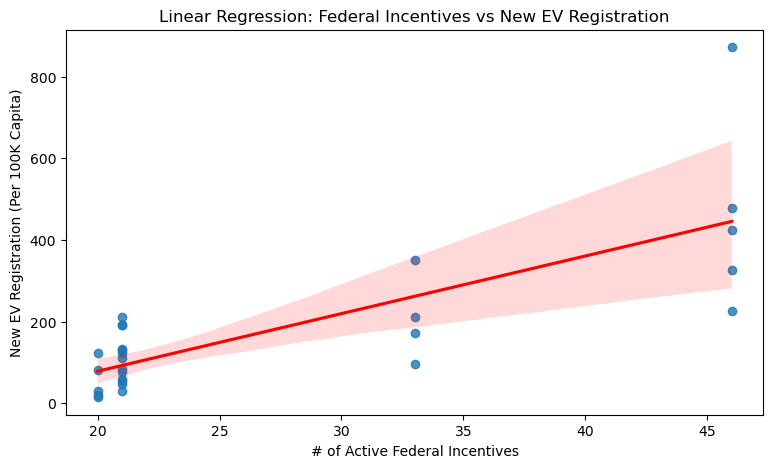

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     37.74
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.01e-06
Time:                        23:28:54   Log-Likelihood:                -166.20
No. Observations:                  27   AIC:                             336.4
Df Residuals:                      25   BIC:                             339.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -203.7527     66.575     -3.060      0.0

In [25]:
# Train, Test split
train, test = train_test_split(
    data, 
    test_size=0.1, 
    random_state=2950
)

# Train data
X_train_ps1 = train[['incentives']] 
X_train_ps1 = sm.add_constant(X_train_ps1) 
y_train_ps1 = train['new_reg_per_capita']

# Test data
X_test_ps1 = test[['incentives']]
X_test_ps1 = sm.add_constant(X_test_ps1) 
y_test_ps1 = test['new_reg_per_capita']

# Fit model
model_ps1 = sm.OLS(y_train_ps1, X_train_ps1)
results = model_ps1.fit()

#Estimate of regression plot line using regplot
plt.figure(figsize=(9, 5))
sns.regplot(
    x = train['incentives'],
    y = train['new_reg_per_capita'],
    line_kws={"color": "red"}
)

plt.title("Linear Regression: Federal Incentives vs New EV Registration")
plt.xlabel("# of Active Federal Incentives")
plt.ylabel("New EV Registration (Per 100K Capita)")
plt.show()

print(results.summary())

**Model Analysis:**

**Summary:** 

Our model's coefficient for federal incentives is 14.1143, which suggests that for each additional active federal incentive in place, all else equal, a state can expect an $\underline{\text{increase}}$ of approximately 14.1 annual new EV registrations per 100k capita from before. To clarify, this increase is in the $\underline{\text{rate}}$ of EV registrations, (e.g. if before there were 20 EVs adopted per year now there are 20 + 14.1 = 34.1 EVs adopted per year) not simply the cumulative total number of EVs adopted. This coefficient indicates that federal incentives might have a very significant positive effect on EV adoption rates.

To better illustrate the magnitude of this effect:
- 5 additional federal incentives are expected to increase annual EV adoption rates by roughly 70 new EVs per 100k capita. 
- 15 additional federal incentives are expected to increase annual EV adoption rates by roughly 210 new EVs per 100k capita.

The intercept coefficient is -203.75, which represents the expected number of new EV registrations per capita when there are no federal incentives. Since EV registrations are cumulative and do not go down (at least in the dataset we're working with), a negative rate value for EV adoption does not make sense and is an oddity. The intercept should not be interpreted literally and simply provides a baseline for our model.

**Predicting:**

A few example predictions from our model:

- If there are 20 federal incentives in place, a state will be expected to have an annual new EV registration rate of roughly 78.25 new EV registrations per 100k people.
- If there are 50 federal incentives in place, a state will be expected to have an annual new EV registration rate of roughly 502 new EV registrations per 100k people.


**Oddities:**

One significant oddity is when federal incentives dips below roughly 15 and the predicted EV registration rate becomes negative due to the large negative intercept. This was discussed above and should not be treated as a valid interpretation, as we limit our range to positive rates. Furthermore, the domain of our model is not limited, meaning extreme numbers negative amounts of federal incentives or near infinite amounts of federal incentives have prediction values despite not being a logical scenario. The regression plot shows how the data points are focused along 3 columns, meaning that federal EV incentives were enacted in groups during 3 individual years (or the government dataset was only updated thrice), placing doubt on the effectiveness of our federal incentive data when building a robust model. 

The main outliers in the data-points would come from California, which experienced significantly more EV registrations than other states, creating outliers in the datapoints like the point on the regplot with y > 800 (representing CA in 2022). This likely reflects unaccounted for cultural differences regarding EVs across different states, as well as potential unique state-level incentives that we don't incorporate into our state-generic model.

Also, while the p-value seems fine for our OLS regression model, the regression plot seems to span outwards into fan shape with larger x-values corresponding to more spread-out y-values, suggesting that the residual plot might show a fan shape as well. We will check for this heteroskedasticity in the evaluation of significance section.

#### <a name="data-analysis1eos"></a>Hypothesis 1 Evaluation of Significance

While the coefficient of our model seems meaningful and the p-value is incredibly low (0.000), since we are working with small datasets we should check the residual plot to ensure we're not overlooking any heteroskedasticity.

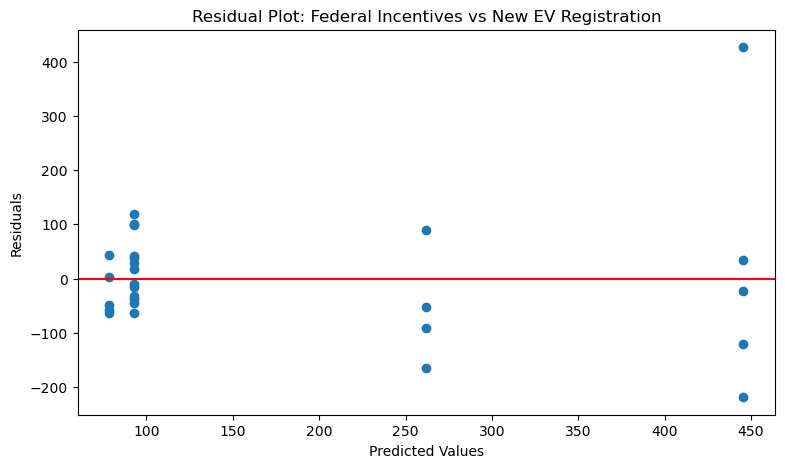

In [5]:
# Make predictions
train_pred_ps1 = results.predict(X_train_ps1)

# Residuals
residuals_ps1 = y_train_ps1 - train_pred_ps1

# Residual Plot
def residual_plot(pred, resid):
    plt.scatter(pred, resid, marker='o')
    plt.axhline(y=0, color='red')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals') 
    plt.show()

plt.figure(figsize=(9, 5))
plt.title("Residual Plot: Federal Incentives vs New EV Registration")
residual_plot(train_pred_ps1, residuals_ps1)

This residual plot certainly looks heteroskedastic at first glance, but covering up the single outlier point at y = 400 (this is the CA 2022 outlier) seems to greatly fix the residual plot.

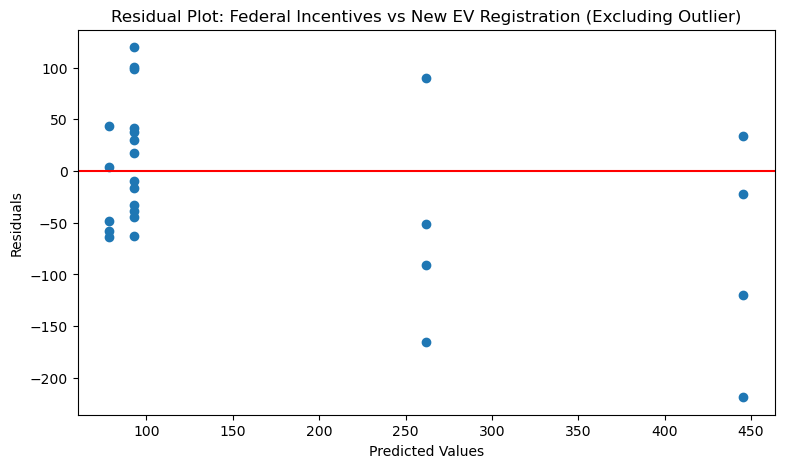

In [6]:
#Plotting residual plot without CA 2022 data at index 5
plt.figure(figsize=(9, 5))
plt.title("Residual Plot: Federal Incentives vs New EV Registration (Excluding Outlier)")
residual_plot(train_pred_ps1.drop(5), residuals_ps1.drop(5))

This residual plot doesn't look nearly as heteroskedastic once we cover up the outlier. However, to obtain confidence that our original model isn't heteroskedastic and the residual plot only looks fan-shaped due to the outlier, we will attempt to perform a Linear-Log transformation and check the new residual plot.

**Log Transformation**

We will create log columns for all of our inputs/indicators in case we need to perform other log transformations. For this hypothesis we will only be using the log of the incentives column though.

In [7]:
# Creating log columns for all inputs
data['log_new_reg_per_capita'] = np.log(data['new_reg_per_capita'])
data['log_min_price'] = np.log(data['min_price'])
data['log_incentives'] = np.log(data['incentives'])
data['log_renewable_prod'] = np.log(data['renewable_prod'])
data['log_charge_per_capita'] = np.log(data['charge_per_capita'])

display(data.head()[["year", "state", "log_new_reg_per_capita", "log_min_price", 
                     "log_incentives", "log_renewable_prod", "log_charge_per_capita"]])

,year,state,log_new_reg_per_capita,log_min_price,log_incentives,log_renewable_prod,log_charge_per_capita
0,2017,California,4.807817,10.135393,2.995732,7.632982,1.475364
1,2018,California,5.358275,10.135393,3.044522,7.927108,1.589433
2,2019,California,5.261922,10.139350,3.044522,7.932578,2.649897
3,2020,California,5.254245,10.305614,3.044522,6.170029,2.762649
4,2021,California,5.863699,10.492107,3.496508,7.593979,2.776539


Next we will use the new logged incentives input to create a Linear-Log model. This will allow us to check the change in coefficients and statistics like p-values and R-squared values, as well as create a residual plot afterwards.

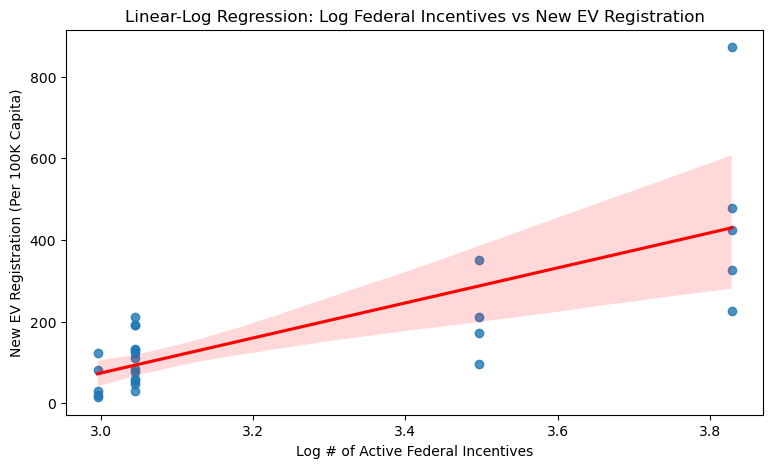

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     34.96
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           3.59e-06
Time:                        20:56:45   Log-Likelihood:                -166.81
No. Observations:                  27   AIC:                             337.6
Df Residuals:                      25   BIC:                             340.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1213.4270    236.886     -5.

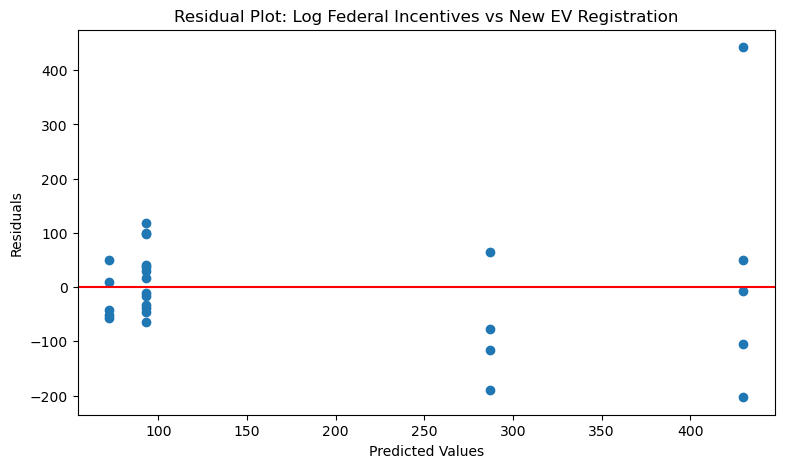

In [8]:
# Train, Test split
train, test = train_test_split(
    data, 
    test_size=0.1, 
    random_state=2950
)

# Train data
X_train_log = train[['log_incentives']] 
X_train_log = sm.add_constant(X_train_log) 
y_train_log = train['new_reg_per_capita']

# Fit model
model_log = sm.OLS(y_train_log, X_train_log)
results_log = model_log.fit()

#Estimate of regression plot line using regplot
plt.figure(figsize=(9, 5))
sns.regplot(
    x = train['log_incentives'],
    y = train['new_reg_per_capita'],
    line_kws={"color": "red"}
)
plt.title("Linear-Log Regression: Log Federal Incentives vs New EV Registration")
plt.xlabel("Log # of Active Federal Incentives")
plt.ylabel("New EV Registration (Per 100K Capita)")
plt.show()

print(results_log.summary())

# Make predictions
train_pred_log = results_log.predict(X_train_log)

# Residuals
residuals_log = y_train_log - train_pred_log

plt.figure(figsize=(9, 5))
plt.title("Residual Plot: Log Federal Incentives vs New EV Registration")
residual_plot(train_pred_log, residuals_log)

The Linear-Log transformation didn't help. In fact, it worsened the significance of the coefficients of the models by increasing their standard error values and decreased the t-statistic. The residual plot still looks heteroskedastic with the outlier, suggesting that it was unnecessary to perform the Linear-Log transformation (we have also tried Log-Linear and Log-Log with similar results). 

Thus, we reason that the original Linear-Linear model was in fact effective and not heteroskedastic, and that it only appeared such due to the California 2022 outlier. Such a large outlier had a large impact on our residual plot since we're working with a small dataset. 

We will not remove this outlier from our dataset though as it still accurately reflects real-world phenomena and preserves the consistency and integrity of our data.

**Statistics, Bootstrap Tests, Error Values**

Now that we have concluded that our original Linear-Linear model was in fact not heteroskedastic and is acceptable, we can run a variety of tests to evaluate the model's performance and significance. 

For reference, these are the regression results of our original model.

In [9]:
#Original Linear-Linear model regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     37.74
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.01e-06
Time:                        20:56:45   Log-Likelihood:                -166.20
No. Observations:                  27   AIC:                             336.4
Df Residuals:                      25   BIC:                             339.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -203.7527     66.575     -3.060      0.0

First, it's important that we check our model isn't overfitting since we're working with a small dataset. To do this, we will calculated error values. Namely root mean squared error values and mean absolute error values. We'll be calculating these values without the California outlier since it greatly affects the error values making them less representative of the average datapoint.

In [10]:
# Predicting on training, and test sets, dropping major CA outlier
train_predictions = results.predict(X_train_ps1).drop(5)
test_predictions = results.predict(X_test_ps1)

# Calculate RMSE and MAE for each set of data, dropping major CA outlier
print(f"Train RMSE: {round(np.sqrt(mean_squared_error(y_train_ps1.drop(5), train_predictions)), 2)}")
print(f"Test RMSE: {round(np.sqrt(mean_squared_error(y_test_ps1, test_predictions)), 2)}")
print(f"Train MAE: {round(mean_absolute_error(y_train_ps1.drop(5), train_predictions), 2)}")
print(f"Test MAE: {round(mean_absolute_error(y_test_ps1, test_predictions), 2)}")

Train RMSE: 80.65
Test RMSE: 51.53
Train MAE: 63.81
Test MAE: 46.41


**RMSE:**
- Our train RMSE value is pretty high at 80.65, suggesting that our predictions on average deviate about ~80 units from the actual value. This is a large portion of the range of output values, as EV registration rates range from 20 to 400 (excluding the outlier). The test RMSE is slightly better at 51 though this is likely just a coincidence.

**MAE:**
- Our train and test MAE values are somewhat close at ~63 and ~46, suggesting that our model performs mediocre with unseen data.

Overall, while it doesn't appear we are overfitting, these error values indicate that our model for federal incentives vs new EV registration rates has mediocre performance at best. However, this is expected as the dataset we are working with is extremely small (~5 states * 7 years = 35 data points). There are also still a few significant outliers that inflate the error values even when excluding CA 2022. 

We expect our multivariate model to have higher performance, which we will test in Part 3, as it will include more data by accounting for more variables all at once. 

**Bootstrap Test**

Next let's conduct a bootstrap test to test our confidence intervals and check the variability of our model coefficients.

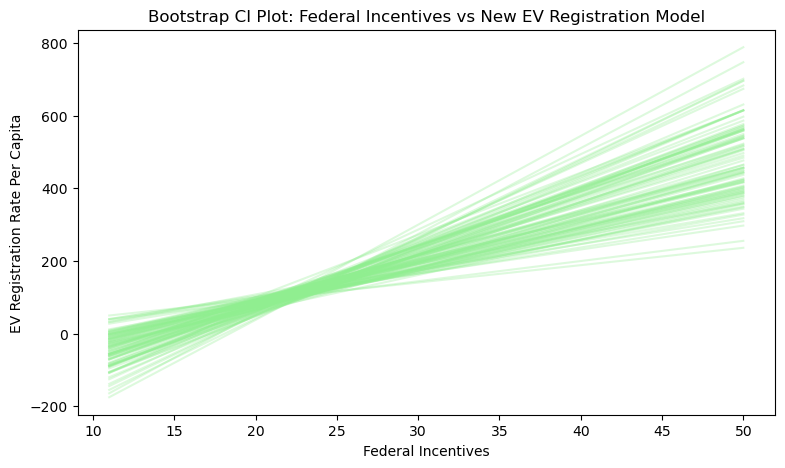

In [11]:
#Create bootstrap samples
bootstrapped_states = list()
for i in range(100):
    bootstrapped_sample = data.sample(n=25, replace=True)
    bootstrapped_states.append(bootstrapped_sample)

domain = np.arange(11, 51).reshape(-1, 1)

#Create models and plot lines for each sample
plt.figure(figsize=(9, 5))

for i in range(100):
    df = bootstrapped_states[i]

    bt_model = LinearRegression().\
    fit(df[["incentives"]].values, df["new_reg_per_capita"].values)
    y_pred = bt_model.predict(domain)
    sns.lineplot(x=domain.\
                 reshape(-1), y=y_pred, color="lightgreen", alpha=0.3)

#Plot
plt.title("Bootstrap CI Plot: Federal Incentives vs New EV Registration Model")
plt.xlabel("Federal Incentives")
plt.ylabel("EV Registration Rate Per Capita")
plt.show()

The lines indicate the relationship between the independent variable (Federal Incentives) and the dependent variable (New Registrations Per Capita). The fact that all lines slope upwards supports a positive relationship between the two variables, meaning higher federal incentives are generally associated with more registrations per capita.

The confidence interval is just decently tight, supporting our conclusion from calculating error values that our model's performance is mediocre. 

However, the coefficient is more stable around 20-30 federal incentives, suggesting that our model has pretty good performance with lower amounts of federal incentives but may be more inaccurate for predicting the effect of a large amount of federal incentives on EV adoption. This makes sense as the regression plot of our model had a fan-shape where error was smaller with smaller federal incentive numbers and higher with higher federal incentive numbers.

For reference:

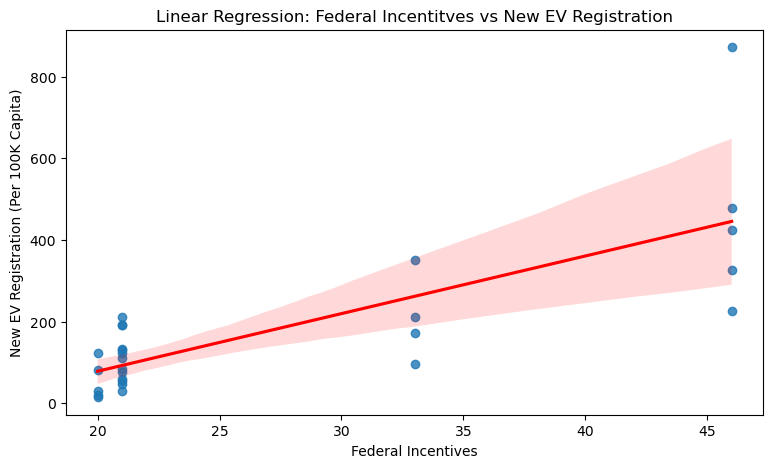

In [26]:
# Estimate of regression plot line using regplot
plt.figure(figsize=(9, 5))
sns.regplot(
    x = train['incentives'],
    y = train['new_reg_per_capita'],
    line_kws={"color": "red"}
)

plt.title("Linear Regression: Federal Incentitves vs New EV Registration")
plt.xlabel("Federal Incentives")
plt.ylabel("New EV Registration (Per 100K Capita)")

plt.show()

**Statistical Significance**

Finally, we test for statistical significance using the statistics in our model's regression results.

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     37.74
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.01e-06
Time:                        20:56:46   Log-Likelihood:                -166.20
No. Observations:                  27   AIC:                             336.4
Df Residuals:                      25   BIC:                             339.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -203.7527     66.575     -3.060      0.0

The p-value of our model is 0.000 for federal incentives, well below the threshold of 0.05. The coefficient for incentives is also significantly greater than 0. Together, this allows us to comfortably reject our null hypothesis that there is no significant relationship between federal incentives and state-level new EV registration rates. 

This hypothesis conclusion is reinforced by other statistics as well, with the R-squared value also high at 0.602, meaning the model explains about 60% of the variance in the dependent variable, a relatively good amount. The t-test value of federal incentives is also high at 6.143, indicating a significant relationship between federal incentives and new EV registration rates.

Overall, while our incentive-EV model may not have the greatest performance in making predictions itself, the regression results still allow us to reject the null hypothesis and conclude that there is $\underline{\text{likely}}$ a significant positive relationship between federal incentives and state-level EV registration rates.

### <a name="data-analysis2"></a>Part 2: Hypothesis 2 - Renewable Energy Production

State-level EV registrations increase with the state's renewable energy production.

- $H_{0}$: ($\beta = 0$) There is no significant relationship between EV registrations and renewable energy production.
- $H_{A}$: ($\beta ≠ 0$) There is a significant relationship between EV registrations and renewable energy production.

#### <a name="data-analysis2analysis"></a>Hypothesis 2 Analysis

Similar to Hypothesis 1, here we will build a linear regression model for renewable energy production, looking at the impact of increasing a state's renewable energy production on EV adoption rates per capita in a state. We will still be using an Ordinary Least Squares (OLS) regression model, which minimizes the sum of the squared errors to find a linear coefficient for the effect between the dependent variable (EV adoption) and the independent variable (federal incentives).

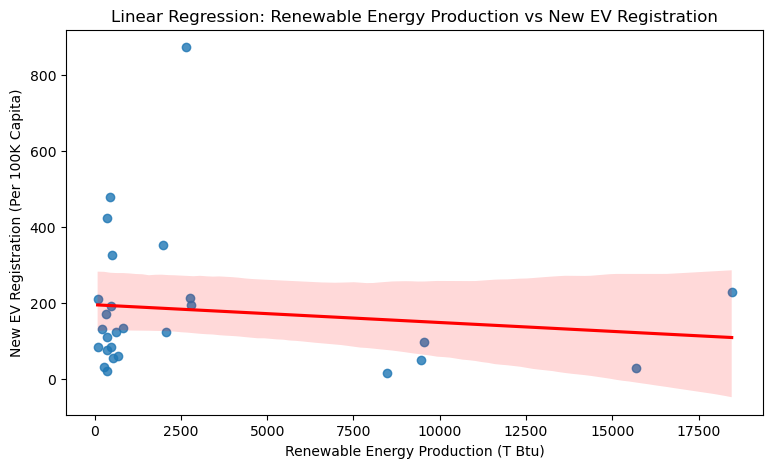

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.3962
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.535
Time:                        23:29:25   Log-Likelihood:                -178.41
No. Observations:                  27   AIC:                             360.8
Df Residuals:                      25   BIC:                             363.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            194.4449     42.165      4.

In [27]:
## OLS Regression

# Regression Plot
plt.figure(figsize=(9, 5))
sns.regplot(
    x = train['renewable_prod'],
    y = train['new_reg_per_capita'],
    line_kws={"color": "red"}
)
plt.title("Linear Regression: Renewable Energy Production vs New EV Registration")
plt.xlabel("Renewable Energy Production (T Btu)")
plt.ylabel("New EV Registration (Per 100K Capita)")
plt.show()

# Train data
X_train_ps2 = train[['renewable_prod']] 
X_train_ps2 = sm.add_constant(X_train_ps2) 
y_train_ps2 = train['new_reg_per_capita']

# Fit model
model_ps2 = sm.OLS(y_train_ps2, X_train_ps2)
results = model_ps2.fit()

print(results.summary())

**Model Analysis:**

**Summary:** 

Our model's coefficient for renewable energy production is -0.0047, which suggests that for a 1 T-Btu increase in a state's renewable energy production, all else equal, we expect an $\underline{\text{decrease}}$ of approximately 0.0047 annual new EV registrations per 100k capita from before. This (surprisingly) indicates that a state's renewable energy production might have a very small, negative effect on the number of new EV registrations per capita. To clarify, this does not mean the cumulative/total number of EV registrations will go down, but rather the rate of new EV registrations will go down, hence the usage of the word "new".

To better illustrate the magnitude of this effect:
- A 1000 T-Btu increase in a state's renewable energy production predicts a rise of roughly 4.7 annual new EV registrations per 100k capita. This prediction is the most applicable, as most states (excluding Texas) increase production by less than 1000 T-Btu per year. 
- A 1 million T-Btu increase in a state's renewable energy production predicts a rise of roughly 4700 annual new EV registrations per 100k capita. 

The intercept coefficient is 194.4449, which represents the expected number of new EV registrations per capita when renewable energy production is zero. While this value might appear large, it's important to remember that the coefficient is an estimate under the assumption of no renewable energy production, which doesn't reflect a realistic scenario, but provides a baseline for the model.

**Predicting:**

A few example predictions from our model:
- A state with roughly 1000 T-Btu annual renewable energy production will be expected to have an annual new EV registration rate of roughly 190 new EV registrations per 100k people.
- A state with roughly 5000 T-Btu annual renewable energy production will be expected to have an annual new EV registration rate of roughly 171 new EV registrations per 100k people.

**Oddities:**

The domain of our model is not limited, meaning extreme numbers negative amounts of renewable energy or near infinite amounts of renewable energy production have prediction values despite not being a logical scenario. The coefficient being negative is inherently odd, as we initially predicted a positive relationship between renewable energy production and EV adoption rate, which would make sense as the former reflects a state's sentiment and support for green energy. This, combined with the extremely high p-value (0.535) suggests that there is something wrong or unaccounted for within our model, which we will address in the evaluation of significance section.

#### <a name="data-analysis2eos"></a>Hypothesis 2 Evaluation of Significance

**Bootstrap + Statistics**

Our OLS regression result gave us the warning that since the condition number is large, there might be multicollinearity or other numerical problems. Since our model is only a single-variable, the latter is more likely. First let's conduct a bootstrap test to test our confidence intervals and check the variability of our model coefficients.

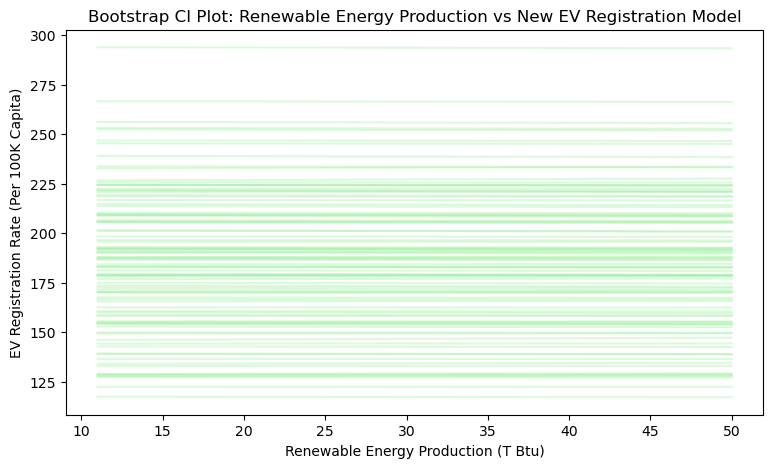

In [15]:
## Bootstrapping
plt.figure(figsize=(9, 5))

#Creating Bootstrap samples
bootstrapped_states = list()
for i in range(100):
    bootstrapped_sample = data.sample(n=25, replace=True)
    bootstrapped_states.append(bootstrapped_sample)

domain = np.arange(11, 51).reshape(-1, 1)

#Building model for each Bootstrap sample
for i in range(100):
    df = bootstrapped_states[i]

    bt_model = LinearRegression().\
    fit(df[["renewable_prod"]].values, df["new_reg_per_capita"].values)
    y_pred = bt_model.predict(domain)
    sns.lineplot(x=domain.\
                 reshape(-1), y=y_pred, color="lightgreen", alpha=0.3)

# Labels
plt.title("Bootstrap CI Plot: Renewable Energy Production vs New EV Registration Model")
plt.xlabel("Renewable Energy Production (T Btu)")
plt.ylabel("EV Registration Rate (Per 100K Capita)")
plt.show()

The residual plot has almost all horizontal lines with different intercepts, which makes sense since our original model had a near 0 coefficient. However, this indicates that there is likely almost no relationship between our two variables since our bootstrapped lines don't even intersect and have vastly different intercepts. To confirm this, we can look at the summary statistics of our original model.

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.3962
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.535
Time:                        20:56:47   Log-Likelihood:                -178.41
No. Observations:                  27   AIC:                             360.8
Df Residuals:                      25   BIC:                             363.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            194.4449     42.165      4.

We see that the standard error for the constant is incredibly high, as was represented in the bootstrapping plot. The p-value is also incredibly high, with 0.535 being vastly greater than our threshold for rejecting the null of p < 0.05. Furthermore, the R-squared value is 0.016, meaning the model explains only about 1.6% of the variance in the number of new EV registrations per capita. This is a very low R-squared, indicating that the model does not do a good job of explaining the variation in the dependent variable new EV registrations, which means renewable energy production is likely not a good indicator to include. Thus, all of these statistics (especially the p-value) let us conclude that we are unable to reject our null hypothesis, and that there is likely no significant relationship between renewable energy production and EV registration rates.

**Residual Plot**

Before we move on, let's check that we didn't incorrectly assume a Linear-Linear relationship between the two variables. To do this, we plot the residuals and check for heteroskedasticity.

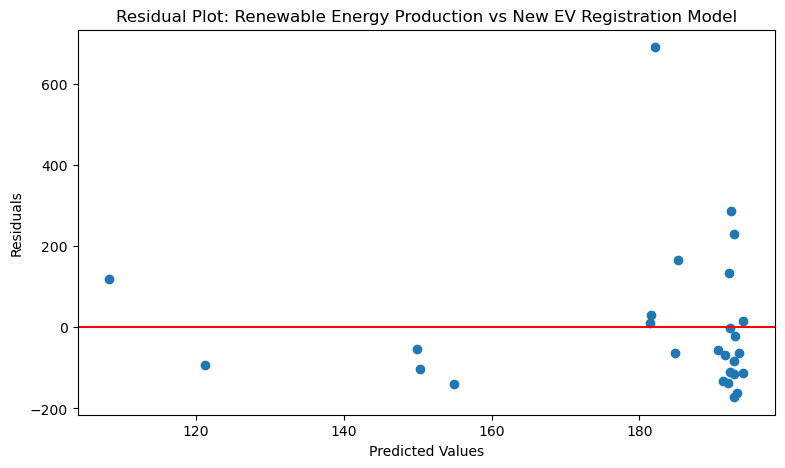

In [17]:
## Residual Plot

# Make predictions
train_pred_ps2 = results.predict(X_train_ps2)

# Residuals
residuals_ps2 = y_train_ps2 - train_pred_ps2
# print(residuals_log_2.head())

# Residual Plot
plt.figure(figsize=(9, 5))
plt.title("Residual Plot: Renewable Energy Production vs New EV Registration Model")
residual_plot(train_pred_ps2, residuals_ps2)

Since we are working with limited data, it is difficult to tell whether or not there actually is heteroskedasticity. The residual plot seems to suggest some potential heteroskedasticity, as the spread of residuals seems to increase with the level of fitted values. But this could also just be the result of outliers, similar to the case with Hypothesis 1. To confirm, we will run a log transformation on the data and recreate the model (more specifically a Linear-Log model). We will also re-plot the residuals to check if the heteroskedasticity is fixed.

**Linear-Log Transformation**

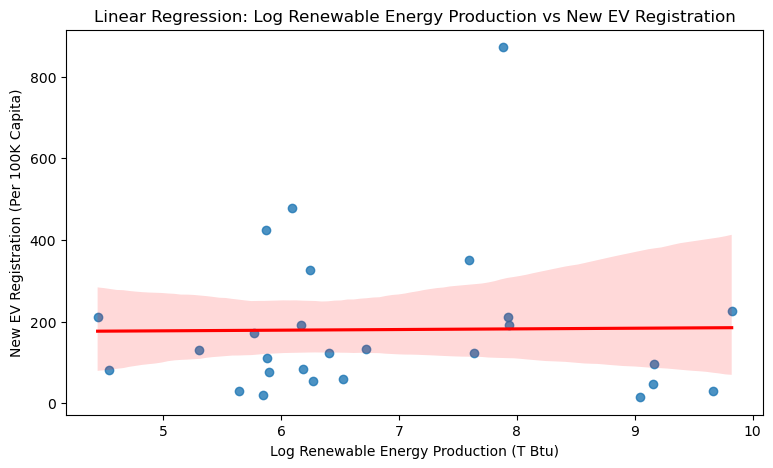

                            OLS Regression Results                            
Dep. Variable:     new_reg_per_capita   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                  0.004265
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.948
Time:                        20:56:47   Log-Likelihood:                -178.62
No. Observations:                  27   AIC:                             361.2
Df Residuals:                      25   BIC:                             363.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                169.5153    171

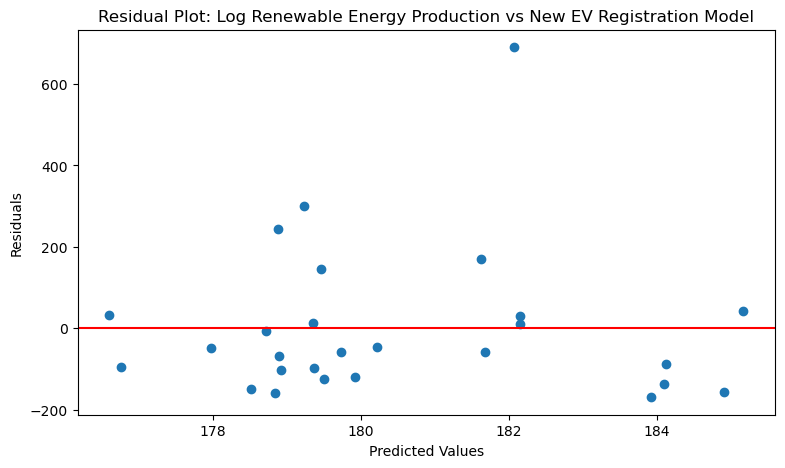

In [18]:
## Regression

# Regression plot using previously made log column
plt.figure(figsize=(9, 5))
sns.regplot(
    x = train['log_renewable_prod'],
    y = train['new_reg_per_capita'],
    line_kws={"color": "red"}
)
plt.title("Linear Regression: Log Renewable Energy Production vs New EV Registration")
plt.xlabel("Log Renewable Energy Production (T Btu)")
plt.ylabel("New EV Registration (Per 100K Capita)")
plt.show()

# Train data
X_train_log_2 = train[['log_renewable_prod']] 
X_train_log_2 = sm.add_constant(X_train_log_2) 
y_train_log_2 = train['new_reg_per_capita']

# Fit model
model_log_2 = sm.OLS(y_train_log_2, X_train_log_2)
results = model_log_2.fit()

print(results.summary())

## Residual Plot

# Make predictions
train_pred_log_2 = results.predict(X_train_log_2)

# Residuals
residuals_log_2 = y_train_log_2 - train_pred_log_2
# print(residuals_log_2.head())

# Residual Plot
plt.figure(figsize=(9, 5))
plt.title("Residual Plot: Log Renewable Energy Production vs New EV Registration Model")
residual_plot(train_pred_log_2, residuals_log_2)

While this transformation does resolve the problem of heteroskedasticity, it worsens the p-value significantly as the new p-value is still higher than our threshold value (0.948 > 0.05) which does not allow us to reject the null hypothesis. 

Additionally, looking at actual model plot (upper graph) we see that our data points are scattered incredibly randomly and that the standard errors for both coefficient and intercept are incredibly high (24 and 170). Especially the coefficient, which has a value of only 1.6 but a standard error of 24! This suggests that our model is highly inaccurate and that there is no significant relationship between renewable energy production and new EV registrations even after a Linear-Log transformation.

Furthermore, the R-squared value of 0 indicates that the regression model explains none of the variance in the state's EV registration (dependent variable) based on its renewable energy production (independent variable). In other words, this means the model's predictions are no better than simply predicting off the mean of the EV registration in each state each year. 

We have analyzed the significance of both the assumed Linear-Linear model $\underline{\text{and}}$ the log-transformed model and concluded $\underline{\text{both}}$ to have low significance through all of the analysis above. Both models have p-values above 0.05, have small interpreted coefficients, and have R^2 values near 0). Thus, we fail to reject the null hypothesis and conclude that there is $\underline{\text{likely}}$ no significant relationship between a state's renewable energy production and its new EV registration rates. Thus, we will omit renewable energy production as an input when building our overall multivariate regression model.

To understand this failed result, we look back at some of the charts we created during our exploratory data analysis phase.

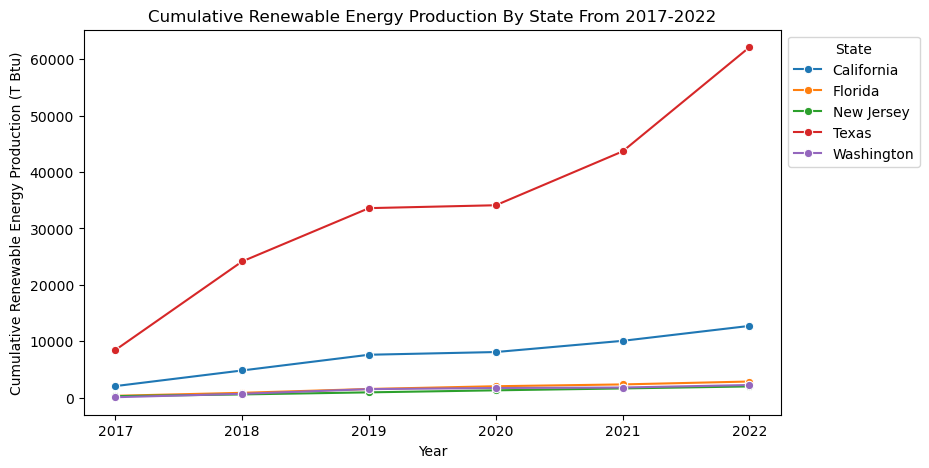

In [19]:
#Grabbing renewable energy data
renewable_df = data[['year', 'state', 'new_reg_per_capita', 'renewable_prod']].copy()
renewable_df['renewable_prod_cum'] = renewable_df.groupby('state')['renewable_prod'].cumsum()

#Create plot
plt.figure(figsize=(9, 5))

#Declare and define vars
s = sns.lineplot(data = renewable_df,
                 x = "year", 
                 y = "renewable_prod_cum", 
                 marker = "o", 
                 hue = "state")

#Prettifying and labeling
s.legend(title = "State")
sns.move_legend(s, "upper left", bbox_to_anchor=(1, 1))

plt.title("Cumulative Renewable Energy Production By State From 2017-2022")
plt.xlabel("Year")
plt.ylabel("Cumulative Renewable Energy Production (T Btu)")

plt.show()

From this graph, there seems to be a clear positive trend with renewable energy production and time, especially with Texas and a bit with California. Since new EV registrations is also mostly positively correlated with time, we expect the two variables to have a positive relationship. The following code plots this relationship.

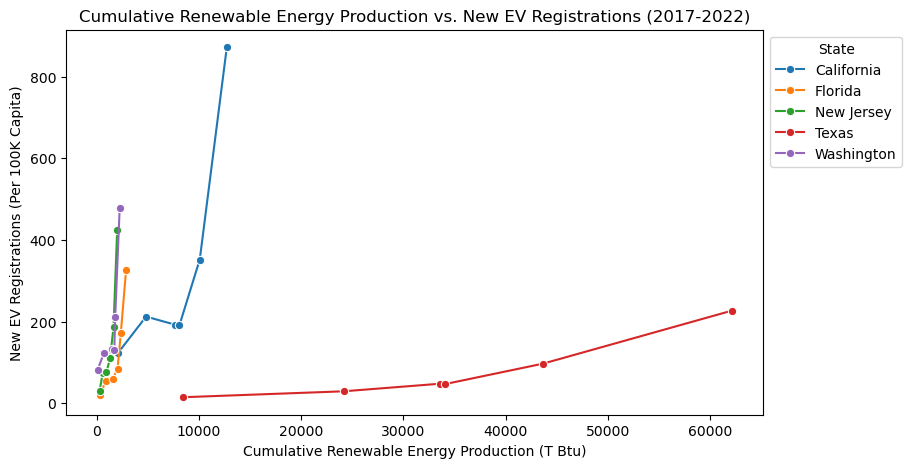

In [20]:
#Plot energy prod vs EV
plt.figure(figsize=(9, 5))

#Declare and define vars
s = sns.lineplot(data = renewable_df,
                 x = "renewable_prod_cum",
                 y = "new_reg_per_capita",
                 marker = "o",
                 hue = "state")

#Prettifying and labeling
s.legend(title = "State")
sns.move_legend(s, "upper left", bbox_to_anchor=(1, 1))

plt.title("Cumulative Renewable Energy Production vs. New EV Registrations (2017-2022)")
plt.xlabel("Cumulative Renewable Energy Production (T Btu)")
plt.ylabel("New EV Registrations (Per 100K Capita)")

plt.show()

We see that despite each state having a relatively positive relationship between the two variables, each state has vastly different slopes, with Texas being the main outlier. Since our model attempts to generalize between all states by normalizing by population and effectively anonymizing each data point's state value, the outlier of Texas has a dramatic effect on our model's performance. This is due to the fact that while each individual state's data points connect to form a positive relationship, connecting data points between any state and Texas will result in a large negative relationship. 

This begs the question, can we really conclude there is $\textbf{no}$ relationship between renewable energy production and EV registration rates? Not really, since each state's lineplot appears to show a very significant positive relationship. All we've shown is that renewable energy's effects on EV registration rates cannot be generalized across states in the same way as the other indicators/variables like Hypothesis 1's federal incentives. In other words, renewable energy production affects each state very differently, causing it to fail in the "state-generalized" models that we use to test our hypotheses. 

Since our end goal is to build an accurate "state-generalized" multivariate regression model to predict any state's EV registration rate, it's still sensible for us to conclude that we fail to reject the null hypothesis (based on above evaluation of significance analysis) and to omit renewable energy production from our overall model as it fails to generalize properly across states.

### <a name="data-analysis3"></a>Part 3: Overall Multivariate Regression Model

$H_{0}$ : None of the predictor variables will have an impact on EV registration (~adoption) rate, whether positive or negative.
- $New\_Registration = \beta_0 + \beta_1 Min\_Price + \beta_2 Federal\_Incentive + \beta_4 Charge\_Stations$

$H_{A}$ : At least one of the predictor variables (minimum price, federal incentives, charging stations) has an impact, whether positive or negative, in terms of predicting the state-level EV registration rates.
- $\beta_i ≠ 0$ (where i ~ [1, 2, 4])

#### <a name="data-analysis3analysis"></a>Overall Model Analysis

Here we will build a multivariate regression model with a fixed effects model, which will help control for unobserved variables that are constant over time but vary across states. Such examples of state-specific data could be geography, weather, as well as longstanding cultural and legal frameworks. Fixed effects helps isolate the effects of explanatory variables by accounting for this unobserved heterogeneity. 

In [21]:
data = data.set_index(['state', 'year'])
input_var = ['min_price', 'incentives', 'charge_per_capita']

X = data[input_var]
X = sm.add_constant(X)
y = data['new_reg_per_capita'] 

# Fit PanelOLS with fixed effects
model = PanelOLS(y, X, entity_effects=True).fit()
print(model.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     new_reg_per_capita   R-squared:                        0.8413
Estimator:                   PanelOLS   R-squared (Between):              0.6143
No. Observations:                  30   R-squared (Within):               0.8413
Date:                Mon, Dec 09 2024   R-squared (Overall):              0.7877
Time:                        20:56:47   Log-likelihood                   -165.70
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      38.868
Entities:                           5   P-value                           0.0000
Avg Obs:                       6.0000   Distribution:                    F(3,22)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             38.868
                            

In [28]:
### Checking for collinearity
X.corr()

,const,min_price,incentives,charge_per_capita
const,NaN,NaN,NaN,NaN
min_price,NaN,1.000000,0.406622,0.345195
incentives,NaN,0.406622,1.000000,0.295352
charge_per_capita,NaN,0.345195,0.295352,1.000000


Prior to our analysis, to ensure there isn't any multicollinearity present, we created a correlation matrix and found that no correlation between indicators were above 0.5 (suggesting no multicollinearity).

**Model Analysis:**

**Summary:** 

Our multivariate regression yields a predictive model for new EV regsistration count per 100K capita that can be represented by the function:
$$
\text{New EV Registration} = -33.852 -0.0090\text{ Min Price} + 13.888\text{ Federal Incentives} + 11.988\text{ Charge Stations}
$$
Each of its elements can be interpreted as follows:

- const (-33.852): The constant term is not statistically significant (p=0.7329) and does not provide any meaningful insight into EV registrations per capita when all other variables are held constant. The interpretation of this coefficient further non-sensical, as it predicts the rate of EV adoption per 100k people would be –33.852 per year if the minimum price was 0, there were no federal incentives, and no EV charge stations. While this scenario assuming a negative EV registration count doesn't make logical sense, it provides a baseline for our model.
  
- $\beta_\text{min price}$ (-0.0090): A decrease in the minimum EV price is statistically significant (p=0.0366) and is associated with an increase in EV registrations per capita. This makes logical sense according to the basic law of demand, where the lower the price of a good, the higher the demand for it. The effect size may seem very small: for every unit decrease in the minimum EV price, annual new registrations increase by approximately 0.0090 per 100k people. However, to contextualize this, a 1 USD price difference is very small for a car (e.g. min_price in California in 2017 = 25,220 USD). If this minimum price were to drop by 2,500 USDs, (approximately 1%), this would lead to 22.5 new EVs registered for each 100k people.
  
- $\beta_\text{incentives}$ (13.888): Federal EV incentives are highly significant (p=0.000) and positively correlated with EV registrations per capita. For each additional federal incentive, annual new registrations increase by approximately 14 per 100k people.
  
- $\beta_\text{charge per capita}$ (11.988): Charging stations per 100K capita are statistically significant (p=0.0415), suggesting that an increase in charging stations can lead to a rise in EV registrations per 100K capita. For every unit increase in charging stations per 100k people, annual new registrations increase by approximately 11 per 100k people.


**Predicting:**

Given the model, here are a few example predictions for the annual new EV registration rate per 100k people:

- A state with a minimum EV price of 25,000 USD, federal incentives of 50, and 30 charging stations per 100k people will have an estimated new EV registration rate of approximately 95 new registrations per 100k people.
- A state with a minimum EV price of 30,000 USD, federal incentives of 80, and 50 charging stations per 100k people will have an estimated new EV registration rate of approximately 212 new registrations per 100k people.
- A state with a minimum EV price of 22,000 USD, federal incentives of 40, and 20 charging stations per 100k people will have an estimated new EV registration rate of approximately 49 new registrations per 100k people.

**Oddities:**

One notable oddity in the model is that it can produce unrealistic predictions when input values fall outside typical ranges. For example, when the number of charging stations or the level of federal incentives reaches extreme levels, the model might generate predictions that are not grounded in real-world possibilities. This issue arises because the model lacks constraints, meaning extreme or illogical input values can lead to unreasonable predictions.

#### <a name="data-analysis3eos"></a>Overall Model Evaluation of Significance

In [23]:
predictions = model.predict(X)

# Calculate RMSE (Root Mean Squared Error) & MAE (Mean Absolute Error)
rmse = np.sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)

# Print the results
print(f"RMSE: {round(rmse, 2)}")
print(f"MAE: {round(mae, 2)}")

RMSE: 80.2
MAE: 46.62


* **RMSE**: Our RMSE value is 80.2, indicating that, on average, our model's predictions deviate by approximately 80 units from the actual values. Given that the scale of our dependent variable (new_reg_per_capita) range in the hundreds, this RMSE suggests a relatively large error.

* **MAE**: Our MAE value is 46.62, which suggests that the model's predictions are off by about 46 units on average. Given that RMSE tends to be more sensitive to larger errors (as it squares the errors) and our RMSE is larger than our MAE, this indicates our model may have a few larger errors in our predictions that are affecting RMSE more than MAE. This supports conclusions we drew throughout our previous data analysis that outliers (such as California 2022) are significantly impacting our model and RMSE values.
  
**Overall**:
While the error metrics are quite large, they indicate that the model’s performance is not the strongest. Considering our small dataset size (~observations across 5 entities and 6 years), we expected some level of error. However, we indeed did get a significant amount of error as an RMSE value of 80 is roughly 10% of the total range of our output variable, exacerbated by the fact that the majority of the output variables are on the lower end of the range (lots of overprediction for small outputs).

While we expected running a multivariate regression would improve our RMSE and MAE values, they showed little to no change (MAE down by ~5). Unfortunately, it appears our model performance has not improved and is still only moderately accurate for predicting EV adoption rates. If more variables were to be included, and more importantly, if a larger dataset (e.g. larger time frame and more time-granular data) were to be used, the performance would improve, leading to more accurate predictions. Ultimately, our major limitation is the size of our dataset.

However, despite these limitation in our model's predictive accuracy, other model statistics allow us to draw meaningful conclusions from our model regarding the *significance* of relationships between indicators and new EV registration (even if we are unable to derive the accurate *magnitude* of these relationships.)

* **P-values**
    * The p-values for our input variable coefficients (min_price, incentives, and charge_per_capita) are all below our chosen threshold of 0.05, indicating that these predictors are statistically significant. In other words, we can reject the null hypothesis for these variables, suggesting they have a meaningful impact on the dependent variable (new_reg_per_capita).
      
    * While the intercept has a high p-value of 0.7329, this is common in fixed effects models, as the intercept often serves a baseline value that does not provide additional meaningful insight in the context of the model. Its role is primarily to provide a reference point for the predictions rather than serving as a critical parameter.


* **R-squared Values**
    * The R-squared values measure how well the model explains the variance in the dependent variable. The three types of R-squared values in a fixed effects model are:
        * Within R-squared (0.8413): This measures the proportion of variance explained by the model within each entity (e.g., within each state or country over time). A high value here (84.13%) suggests that the model explains a substantial portion of the variability within entities, indicating a good fit of the model to the data for within-entity variation.
      
        * Between R-squared (0.6143): This measures the proportion of variance explained by the model between entities. It explains 61.43% of the variation between entities, suggesting that the model is also capturing the between-entity variation, but less effectively than within-entity variation.
      
        * Overall R-squared (0.7877): This combines both within-entity and between-entity variation, explaining 78.77% of the total variation in the dependent variable. Considering that social sciences even consider values as low as 0.3 to be acceptable depending on the research context, this is a strong R-squared value, indicating that the model provides evidence for a strong overall relationship.

* **F-statistics and Model Significance**
    * Overall F-statistic (38.868): The F-statistic tests whether the model as a whole is statistically significant, meaning that the independent variables (predictors) together explain a significant portion of the variation in the dependent variable. Given the extremely small p-value (0.0000), we can reject the null hypothesis and conclude that the model is statistically significant. This indicates that the independent variables together have a strong explanatory power.
      
    * F-test for Poolability (3.1304): This tests whether the fixed effects model is necessary, or if a simpler pooled regression model would be appropriate. Since the p-value (0.0351) is less than 0.05, we can reject the null hypothesis that a pooled model is appropriate, implying that the fixed effects model is the correct model to use. This confirms that accounting for entity-specific effects (in our case, differences between states and years) improved our model.

* **Overall**
    * Overall, this analysis indicates that our multivariate regression model is statistically significant, despite not being a strong fit to our data. The coefficients for individual predictors (min_price, incentives, and charge_per_capita) are all statistically significant, with p-values well below 0.05, indicating meaningful relationships with the dependent variable. The high within R-squared value suggests the model explains a substantial portion of variation within entities, and the F-statistics confirm our model's overall significance, indicating that the predictors together explain a significant amount of the dependent variable's variance. Additionally, the F-test for Poolability suggests that the fixed effects model is appropriate, accounting for entity-specific differences and improving the model's accuracy. Overall, our model provides us confidence that the relationships between the predictors and the dependent variable are meaningful.

## <a name="conclusions"></a>Conclusions: 

Our research aimed to identify factors that reliably predict electric vehicle (EV) registration growth across U.S. states and examine how much these factors influence the growth. To do so, we focused on two main hypotheses: 
1. Federal Incentives: State-level EV registrations increase with the total number of federal incentives available.
2. Renewable Energy Production: State-level EV registrations increase with the state's renewable energy production.
Additionally, we built a predictive model with a multivariate regression.

While we were unable to derive the accurate *magnitude* of the relationships between the indicators and dependent variable, we were able to draw meaningful conclusions regarding the *significance* of such relationships.

**Federal Incentives and EV Registrations**
To address our first hypothesis, our analysis revealed a statistically significant and positive relationship between federal incentives and EV registration rates. The model yielded a coefficient of 14.1143, which indicates that for every additonal federal incentive implemented, we observed an increase of approximatley 14.1 new EV registrations per 100,000 capita annually. Additionally, the model's relatively high R-squareed value (0.602) suggest that federal incentives play an important role in promoting EV registrations. This aligns with the goals of recent policies like the _Inflation Reduction Act_, which focus on expanding tax credits and clean energy infrastructure to support EV registrations. Overall, the positive impact of federal incentives on EV registration rates indicates that policy measures are successfully addressing barriers (e.g., upfront costs) that have historically hindered the acceleration of EV registrations. 

**Renewable Energy Production and EV Registrations**
In addressing our second hypothesis, our findings did not reveal a significant relationship between a state's renewable energy production and its EV registration rates. While some individual states showed positive correlations between renewable energy production and EV registrations, these relationships varied notably across states, thereby preventing a meaningful generalization in our model. This inconsistency was further highlighted by the small negative coefficient (-0.0047), an insignificant p-value (0.535), and an R-sqaured valies of just 0.016, which indicates minimal explanatory power. Moreover, even after applying log-transoformations to address potential non-linearity, the model's performance remained poor, with an R-squared value of 0.000 and a p-value of 0.948. This suggests that renewable energy production alone does not explain EV registrations rates and that other factors may likely have a bigger impact. 

**Multivariate Analysis**  

To further explore the factors influencing EV adoption, we conducted a multivariate analysis using a Panel Ordinary Least Squares (PanelOLS) model, which included variables such as **minimum EV price** and **charging stations** per 100,000 capita, along with **federal incentives**. Since our end goal is to build an accurate "state-generalized" multivariate regression model to predict any state's EV registration rate, we omitted renewable energy production from our overall model as it fails to generalize properly across states, a decision based on the evaluation of significance analysis. The results revealed a significant negative relationship between minimum EV price and new EV registrations (coefficient: -0.0090, p-value: 0.0366). Particularly, for every unit increase in the minimum EV price, annual new registrations decrease by approximately 0.0090 per 100,000 people, indicating that higher EV prices are associated with fewer registrations. Conversely, there was a strong positive relationship between federal incentives and new EV registrations (coefficient: 13.888, p-value: 0.0000), suggesting that for every additional federal incentive implemented, we observe an increase of approximatley 13.888 new EV registrations per 100,000 capita annually. This implies that increased incentives lead to higher EV registrations, as also observed in Hypothesis 1. Additionally, the model found a positive relationship between the number of charging stations per 100,000 capita and new EV registrations (coefficient: 11.988, p-value: 0.0415). Specifically, an increase of 1 charging station per 100,000 capita causes annual new registrations to increase by approximately 12 per 100,000 people, which highlights the importance of infrastructure in supporting EV growth. The model's overall R-squared value of 0.7877 indicates that these factors together explain a substantial portion of the variance in EV registration rates across states and time periods.

**Broader Implications**
The progress of EV adoption in the United States shows relatively promising growth. Federal incentives have proven effective in increasing EV registrations by making electric vehicles more accessible to consumers, which highlights the importance of targeted policies in encouraging the transition to sustainable transportation.

However, our findings reveal a weak connection between renewable energy production and EV registrations, suggesting that renewable energy alone does not significantly drive EV uptake. While higher renewable energy production is an important part of the clean energy transition, it does not automatically translate into higher EV adoption. This disconnect points to the need for a broader set of factors influencing consumer behavior, such as state-specific policies, infrastructure development, and consumer awareness of the environmental benefits of EVs. Research from MIT suggests that under ambitious climate mitigation scenarios, the global EV fleet could grow to 585-823 million vehicles by 2050, potentially accounting for two-thirds of the global light-duty vehicle fleet (Dwortzan, 2021). This growth could significantly contribute to reducing global carbon emissions, one of the main priorities stated in the [United States Federal Sustainability Plan](https://www.sustainability.gov/federalsustainabilityplan).

To accelerate EV adoption to achieve these goals, policymakers should focus on an approach that considers the full range of factors that affect adoption. This includes continuing to support federal incentives while also addressing regional and local barriers, such as expanding EV infrastructure and increasing public education about the benefits of EVs and renewable energy. By aligning these efforts with broader clean energy and sustainability goals, the U.S. can make more significant progress in reducing emissions and achieving long-term environmental targets.

## <a name="limitations"></a>Limitations: 

**Geographic and Temporal Scope:**
Our analysis focuses on five states: California, Florida, Texas, Washington, and New Jersey. While these states lead the nation in EV registrations, their characteristics may not be representative of all U.S. states. As a result, this limited sample size introduces a risk of overgeneralization. Consumers of our analysis — be they policymakers, industry professionals, or researchers — might be inclined to extrapolate our findings across the entire United States. However, such broad application could result in misguided strategies or inaccurate forecasts. Additionally, the time frame (2016–2023) may exclude earlier trends or emerging policies that influence EV adoption. This limitation could result in an incomplete understanding of long-term EV adoption trajectories. For instance, entities investing in EV infrastructure might lack a comprehensive view of trends, potentially leading to suboptimal long-range planning. As an example, they might underestimate future charging infrastructure requirements if earlier adoption patterns are not factored into their projections.

**Data Gaps and Representation:**
Some variables, like renewable energy production and charging station counts, may not fully represent the nuanced factors influencing EV adoption. For instance, renewable energy production does not account for how much of that energy is directly used for EV charging. This limitation could overstate the environmental benefits of EV adoption in some regions, particularly those relying on renewable energy for other purposes. Moreover, federal incentives data is cumulative but does not differentiate between varying levels of effectiveness across states or time. This could be a concern for policymakers when evaluating efficacy of incentive programs, which could potentially result in suboptimal allocation of resources or ineffective policy adjustments.

**Normalization and Transformation Limitations**:
Some factors, like federal incentives and EV prices, clearly influence EV registration rates. However, while the minimum EV price was statistically significant, its practical impact was small, suggesting potential issues with scaling or data granularity. Additionally, residual plots revealed varying levels of spread, indicating potential heteroskedasticity, which violates key assumptions of linear regression. Although applying a log transformation helped to address this, it weakened the model’s statistical significance. Both the linear and log-transformed models struggled to establish a strong relationship, as shown by high p-values and low R-squared values, and as a result, renewable energy production was excluded from the final model. These limitations could impact policymakers and urban planners, as the findings may not fully capture all factors influencing EV registration rates. For example, overestimating the importance of predictors like minimum EV price might lead to disproportionate emphasis on lowering EV costs rather than addressing other barriers, such as infrastructure availability or consumer education. Similarly, a city planner relying on this analysis to decide where to install public EV charging stations could misallocate resources. Misinterpretations like this could result in strategies that fail to adequately support EV adoption.

Furthermore, in an effort to improve model performance and fix for potential heteroskedasticity, we performed numerous log transformations throughout our data analysis. We acknowledge that an exponential transformation might have better modeled our data, but nonetheless we chose to stick with a linear model. This is because exponential transformations quickly produce incredibly large, unrealistic prediction values for even small increases in our indicators. We wanted our model to still be reliable across a large range of indicator changes, as such is more reflective of real-world scenarios.

Ultimately, we chose to keep our linear regression model despite its mediocre performance for the sake of maintaining realistic interpretations and predictions, which we believe is more important in a model. 


**Size of Dataset and Outliers**:
The main limitation of our research was the small size of our dataset. Since our EV registration dataset only contained data from 2016 to 2023, we were limited in the time scope of our data. Furthermore, since most US states didn’t have significant increases in EV adoption over time, we were limited to analyzing data from the top states in EV adoption if we wanted meaningful coefficients. This dataset size limitation, combined with the existence of numerous outliers like the datapoint for California 2022, has made building an accurate model with low variation incredibly challenging. 

## <a name="acknowledgements"></a>Acknowledgements and Bibliography: 

We express our sincere gratitude to the researchers and organizations whose contributions laid the groundwork for our study on electric vehicle (EV) adoption. This project draws inspiration from a robust body of literature highlighting key factors influencing EV adoption, particularly the role of federal incentives and charging infrastructure.

For example, Javadnejad et al. (2023) underscore the pivotal role of federal tax credits in driving EV adoption in the United States. Their research demonstrates how policies like the $7,500 tax credits introduced through the Inflation Reduction Act (IRS, 2023) have significantly influenced consumer purchasing decisions by lowering the upfront cost of EVs.

Accessible charging infrastructure also plays a crucial role in promoting EV adoption. The U.S. Bureau of Labor Statistics (2023) underscores the importance of charging station availability in alleviating range anxiety and enhancing consumer confidence in EV usability. This aligns with our findings, which reveal charging station availability as a key predictor of state-level EV registration growth, alongside federal incentives.

In contrast, the influence of renewable energy production on EV adoption appears less direct. While the U.S. Department of Energy (2023) highlights the environmental benefits of renewable energy in reducing life-cycle emissions for EVs, our analysis found no statistically significant relationship between renewable energy production and EV registrations. This disconnect suggests that renewable energy's impact may be mediated by other factors, such as policy initiatives and infrastructure development.

Building on these insights, our project integrates these variables into a predictive model for state-level EV registration growth. By doing so, we aim to provide actionable recommendations for policymakers and stakeholders, supporting more effective resource allocation and advancing the transition to a sustainable, low-carbon transportation future.

**<h3>References</h3>**

**<h4>Current Notebook (INFO2950_Phase_5_Deliverable)</h4>**

<p style="padding-left: 40px; text-indent: -40px;">
Dwortzan, M. (2021). Electrifying cars and light trucks to meet Paris climate goals. MIT News. Retrieved from <a href="https://news.mit.edu/2021/electrifying-cars-light-trucks-meet-paris-climate-goals-0810">https://news.mit.edu/2021/electrifying-cars-light-trucks-meet-paris-climate-goals-0810</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
Das, P.K., & Bhat, M.Y. (2021). Renewable energy policies and EV adoption. <i>Environmental Science and Pollution Research</i>. Retrieved from <a href="https://link.springer.com/article/10.1007/s11356-021-18211-w">https://link.springer.com/article/10.1007/s11356-021-18211-w</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
Javadnejad, R., et al. (2023). Federal tax credits and EV adoption. <i>Environment, Development and Sustainability</i>. Retrieved from <a href="https://link.springer.com/article/10.1007/s10669-023-09958-3">https://link.springer.com/article/10.1007/s10669-023-09958-3</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
U.S. Environmental Protection Agency. (2023). Sources of greenhouse gas emissions. Retrieved from <a href="https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions">https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
Internal Revenue Service. (2023). Credits for new clean vehicles purchased in 2023 or after. Retrieved from <a href="https://www.irs.gov/credits-deductions/credits-for-new-clean-vehicles-purchased-in-2023-or-after">https://www.irs.gov/credits-deductions/credits-for-new-clean-vehicles-purchased-in-2023-or-after</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
International Energy Agency. (2024). Global EV outlook 2024: Trends in electric cars. Retrieved from <a href="https://www.iea.org/reports/global-ev-outlook-2024/trends-in-electric-cars">https://www.iea.org/reports/global-ev-outlook-2024/trends-in-electric-cars</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
U.S. Department of Energy. (2023). Electricity benefits. Alternative Fuels Data Center. Retrieved from <a href="https://afdc.energy.gov/fuels/electricity-benefits">https://afdc.energy.gov/fuels/electricity-benefits</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
U.S. Energy Information Administration. (2023). Declining costs of EVs expected to impact affordability. Retrieved from <a href="https://www.eia.gov/todayinenergy/detail.php?id=56480">https://www.eia.gov/todayinenergy/detail.php?id=56480</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
U.S. Bureau of Labor Statistics. (2023). Charging into the future: The transition to electric vehicles. Retrieved from <a href="https://www.bls.gov/opub/btn/volume-12/charging-into-the-future-the-transition-to-electric-vehicles.htm">https://www.bls.gov/opub/btn/volume-12/charging-into-the-future-the-transition-to-electric-vehicles.htm</a>
</p>



---

**<h4>Data Cleaning Notebook (INFO2950_Phase_5_Data)</h4>**

<p style="padding-left: 40px; text-indent: -40px;">
    Federal Highway Administration. (2023, March 14). <i>Biden-Harris Administration opens applications for first round of $2.5 billion program to build EV charging infrastructure</i>. Retrieved from <a href="https://highways.dot.gov/newsroom/biden-harris-administration-opens-applications-first-round-25-billion-program-build-ev">https://highways.dot.gov/newsroom/biden-harris-administration-opens-applications-first-round-25-billion-program-build-ev</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Federal Highway Administration. (n.d.). <i>Fixing America's Surface Transportation Act or "FAST Act"</i>. Retrieved from <a href="https://ops.fhwa.dot.gov/fastact/#:~:text=Fixing%20America's%20Surface%20Transportation%20Act%20or%20%22FAST%20Act%22&text=On%20December%204%2C%202015%2C%20President,funding%20certainty%20for%20surface%20transportation.">https://ops.fhwa.dot.gov/fastact/#:~:text=Fixing%20America's%20Surface%20Transportation%20Act%20or%20"FAST Act"</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Joint Office of Energy and Transportation (2023, September 21). <i>EV Charger Reliability and Accessibility Accelerator Webinar</i>. Retrieved from <a href="https://driveelectric.gov/webinars/ev-charger-reliability-accessibility-accelerator">https://driveelectric.gov/webinars/ev-charger-reliability-accessibility-accelerator</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    National Renewable Energy Laboratory. (n.d.). <i>American Made Program 5-Year Report</i>. Retrieved from <a href="https://americanmadechallenges.org/American-Made-Program-5-Year-Report.pdf">https://americanmadechallenges.org/American-Made-Program-5-Year-Report.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Open Charge Map. (2024). <i>Open Charge Map API</i>. Retrieved November 20, 2024, from <a href="https://openchargemap.org/site/develop/api">https://openchargemap.org/site/develop/api</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
U.S. Census Bureau, Population Division. (2019). Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019 (NST-EST2019-01) [Data file]. Retrieved from <a href="https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx">https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Census Bureau, Population Division. (2023). <i>Annual Estimates of the Resident Population for the United States, Regions, States, District of Columbia, and Puerto Rico: April 1, 2020 to July 1, 2023 (NST-EST2023-POP) [Data file]</i>. Retrieved from <a href="https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx">https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Agriculture. (2022). <i>EV Charging Stations Fact Sheet</i>. Retrieved from <a href="https://www.rd.usda.gov/sites/default/files/508_RD_FS_71EVChargingStations.pdf">https://www.rd.usda.gov/sites/default/files/508_RD_FS_71EVChargingStations.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (2023). <i>Alternative Fuels Data Center: Vehicle Registration Data</i>. Retrieved from <a href="https://afdc.energy.gov/vehicle-registration?year=2023">https://afdc.energy.gov/vehicle-registration?year=2023</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (2023). <i>Domestic Manufacturing Conversion Grants</i>. Retrieved from <a href="https://www.energy.gov/mesc/domestic-manufacturing-conversion-grants">https://www.energy.gov/mesc/domestic-manufacturing-conversion-grants</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy. (n.d.). <i>Find and Compare Cars</i>. Retrieved from <a href="https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023&minmsrpsel=0&maxmsrpsel=0&city=0&hwy=0&comb=0&cbvtelectric=Electric&YearSel=2016-2023&make=&mclass=&vfuel=&vtype=Electric&trany=&drive=&cyl=&MpgSel=000&sortBy=Comb&Units=&url=SearchServlet&opt=new&minmsrp=0&maxmsrp=0&minmpg=0&maxmpg=0&sCharge=&tCharge=&startstop=&cylDeact=&rowLimit=200&pageno=1&tabView=0">https://www.fueleconomy.gov/feg/PowerSearch.do?action=noform&year1=2016&year2=2023</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Energy, Office of Energy Efficiency & Renewable Energy. (2024). <i>Alternative Fuels Data Center: Data Download [Data file]</i>. Retrieved November 20, 2024, from <a href="https://afdc.energy.gov/data_download">https://afdc.energy.gov/data_download</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Department of Transportation. (n.d.). <i>Resilient Surface Transportation Grants</i>. Retrieved from <a href="https://www.transit.dot.gov/grants?combine=Resilient+Surface+Transportation+Grants&field_grant_type_target_id=All">https://www.transit.dot.gov/grants?combine=Resilient+Surface+Transportation+Grants&field_grant_type_target_id=All</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Energy Information Administration. (n.d.). <i>State Energy Data System (SEDS): 1960-2021 (Complete) [Data file]</i>. Retrieved from <a href="https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf">https://www.eia.gov/state/seds/sep_prod/SEDS_Production_Report.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Environmental Protection Agency. (2022). <i>Bipartisan Infrastructure Law Clean School Bus Program: Initial Implementation Report to Congress</i>. Retrieved from <a href="https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P1014098.pdf">https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P1014098.pdf</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    U.S. Environmental Protection Agency. (2024, April 24). <i>Biden-Harris Administration announces nearly $1 billion in grants to invest in America's clean energy future</i>. Retrieved from <a href="https://www.epa.gov/newsreleases/biden-harris-administration-announces-nearly-1-billion-grants-invest-americas-clean-0">https://www.epa.gov/newsreleases/biden-harris-administration-announces-nearly-1-billion-grants-invest-americas-clean-0</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    WE ACT for Environmental Justice. (2023). <i>TCTAC</i>. Retrieved from <a href="https://www.weact.org/tctac/">https://www.weact.org/tctac/</a>
</p>

<p style="padding-left: 40px; text-indent: -40px;">
    Western Interstate Energy Board. (n.d.). <i>Western Interstate Energy Board supports continued funding for the U.S. Department of Energy State Energy Program (SEP)</i>. Retrieved from <a href="https://www.westernenergyboard.org/western-interstate-energy-board-supports-continued-funding-for-the-u-s-department-of-energy-state-energy-program-sep/">https://www.westernenergyboard.org/western-interstate-energy-board-supports-continued-funding-for-the-u-s-department-of-energy-state-energy-program-sep/</a>
</p>




